# Introduction
Hey ML fam! Up for a new project? Today, we'll be predicting some avocado prices! It is a well-known fact that Millenials LOVE Avocado Toast. It's also a well-known fact that all Millenials live in their parent's basements.

Clearly, they aren't buying a home because they are buying too much Avocado Toast!

But maybe there's hope… if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.

# About Data
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the [Hass Avocado Board describes the data on their website](http://www.hassavocadoboard.com/retail/volume-and-price-data):

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar, and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLUs) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

# Evaluation
This project is fairly simple, we'll use some measures like RMSE and similar to these metrics.

As this is just a dataset (And not a Kaggle competition), we'll take 0.2% of our data as our test set, and the rest shall be our training set.

The Dataset / Kaggle Link: https://www.kaggle.com/datasets/neuromusic/avocado-prices

In [37]:
# Importing neccasary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

print("Import Completed")

Import Completed


In [30]:
# Load the data
df_avocados = pd.read_csv("avocado.csv", parse_dates=True)

# Sort data per datetime
df_avocados = df_avocados.sort_values(by='Date')

# Reset Index
df_avocados = df_avocados.reset_index()

# Remove Unnamed: 0 Column as well as index column
df_avocados = df_avocados.drop(columns=["Unnamed: 0", "index"])

# Change 4046, 4225, 4770 to their respective values
df_avocados = df_avocados.rename(columns={"4046":"Small Hass", "4225":"Large Hass", "4770":"XLarge Hass"})

In [31]:
# First 5 rows of the data
df_avocados.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
3,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
4,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


# Explorotary Data Analysis

We'll cover the following things:
* Some `information` about the dataset
* Some `description` of the dataset
* Check `null` values
* Some `PLOTS`:
    * Distribution of `Price` (i.e AveragePrice)
    * Distribution of `Volumne` (i.e Total Volume), then also check for `per_annum`.
    * Count of `Hasses`
    * Count of `Bags`
    * Count of `Type`
    * Count of `Year`
    * Count of `Region`

In [33]:
# Information
df_avocados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   Small Hass    18249 non-null  float64
 4   Large Hass    18249 non-null  float64
 5   XLarge Hass   18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


**Observation**

There are no Null values, and all columns are floats and integers except for Date, type and region. Hence the categorical data types are the following:
* `Type`
* `Region`

Not `date`, becuase I will remove that column, after parsing some stuff out of it. Will do in the Pre-Processing section, which is below.

In [34]:
# Description
df_avocados.describe()

,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


**Observation**

All seems good and perfect, but I see that there are some outliers we need to take care of. The standard devation of `Average Price` is about 0.4, but the 75th Percentile is about 1.66, and even the 25% Percentile seems to be over 1.1, hence we need to take care of these outliers. We'll do this in the Pre-Processing section below.

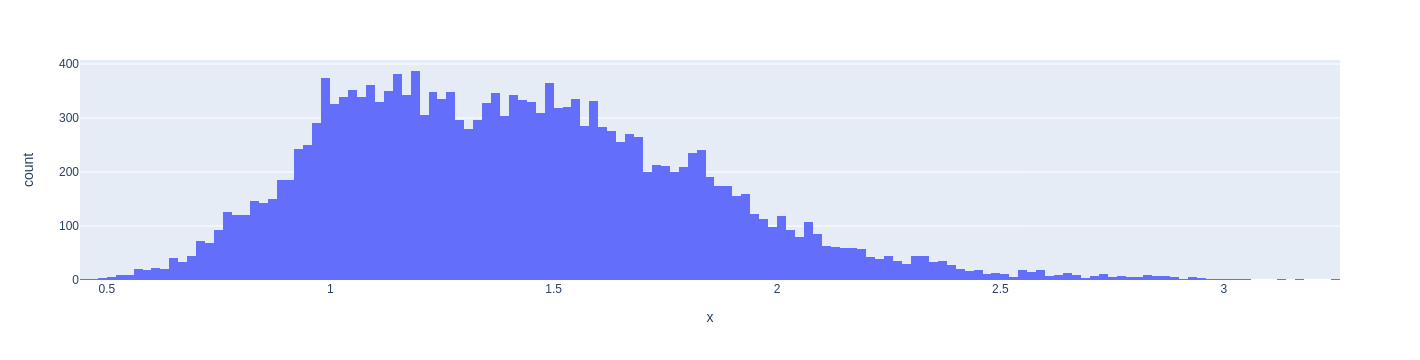

In [43]:
# Distribution of Price
px.histogram(x = df_avocados["AveragePrice"])

**Observaton**

There seems to be some outliers, as I have mentioned above. This plot proved my hypothesis.

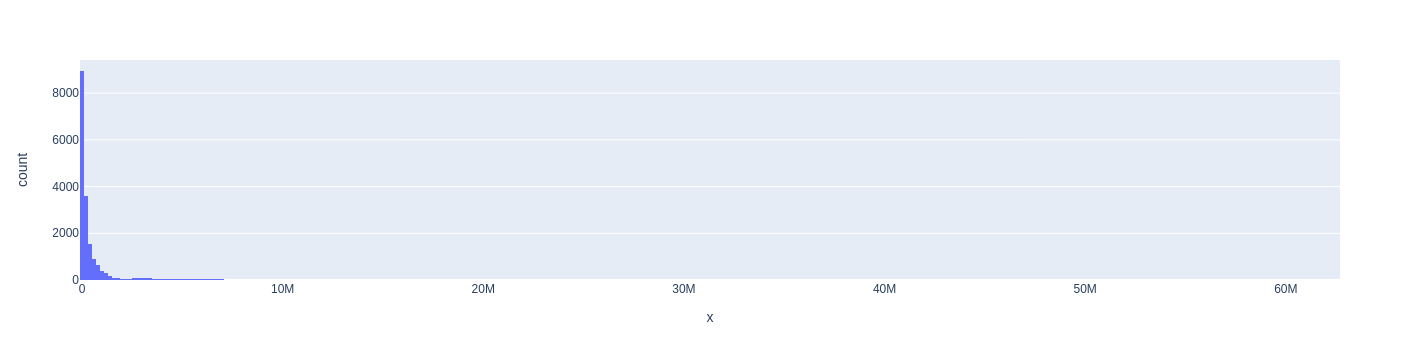

In [48]:
# Distribution of Total Volume
px.histogram(x = df_avocados["Total Volume"])

**Observation**

A lot of outliers can be seen. Will really need to fix them.

<AxesSubplot: xlabel='year'>

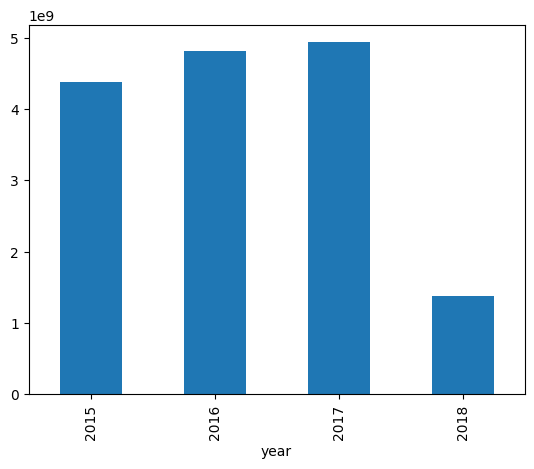

In [65]:
# Distribution of Total Volume per annum
avocados_year = df_avocados.groupby("year")
avocados_year["Total Volume"].agg("sum").plot(kind="bar")